# Twitter User Object

The User object contains public Twitter account metadata and describes the of the Tweet. Users can be anyone or anything. They Tweet, Retweet, add Quotes to Tweets, follow others, create lists, have a home timeline, can be mentioned, and can be looked up in bulk.

- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
- The <i>tweets_users</i> Table is used to store users that can directly be extracted from the Twitter Streaming API
    - Users that posted in real time
    - Users extracted from the real time tweets (ex. if real time tweet is retweet -> user that posted original tweet will be extracted)

In [1]:
import psycopg2
import pandas as pd
import numpy as np
from config import config
from matplotlib import pylab as plt

%matplotlib inline

In [2]:
conn = None
try:
    # read connection parameters
    params = config()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(**params)

    # create a cursor
    cur = conn.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    cur.execute('SELECT version()')

    # display the PostgreSQL database server version
    db_version = cur.fetchone()
    print(db_version)

    # close the communication with the PostgreSQL
    cur.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 10.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.0, 64-bit',)


In [3]:
users = pd.read_sql_query("SELECT * FROM tweets_users;", conn )

print("Number of users: %s" %len(users))

Number of users: 144615


In [4]:
users.head()

,id,name,location,url,description,protected,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,geo_enabled,lang
0,1147894796,NDR MV,Mecklenburg-Vorpommern,http://www.ndr.de/mv,Einfach besser informiert - Nachrichten aus Me...,False,True,12992,196,159,288,16447,Mon Feb 04 12:38:44 +0000 2013,True,de
1,1658019493,Westdeutschlands King,"Emskirchen, Deutschland",https://www.youtube.com/channel/UC7ei2BZIVkJdm...,Hallo! Ich benutze WhatsApp.,False,False,412,469,1,14555,14754,Fri Aug 09 15:27:55 +0000 2013,False,de
2,900252205,Gedanken Karrussel,None,http://gedankenkarrussel.wordpress.com,"Autistin, Christ, Naturwissenschaftlerin, daue...",False,False,437,234,18,70496,12266,Tue Oct 23 17:13:12 +0000 2012,False,de
3,15271006,Jörgen Camrath,Berlin,http://joca.me,Journalist · Head of Social Media @WELT & @N24...,False,True,8562,675,552,36944,41492,Sun Jun 29 15:02:55 +0000 2008,True,en
4,741586484,Bobby O'Shea,None,http://www.beldingpartners.net,Senior Recruiter for the engineering world. M...,False,False,35,5,11,1,27664,Mon Aug 06 22:34:03 +0000 2012,False,en


### Twitter User: lang
- The BCP 47 code for the user’s self-declared user interface language. May or may not have anything to do with the content of their Tweets

Total number of languages: 53


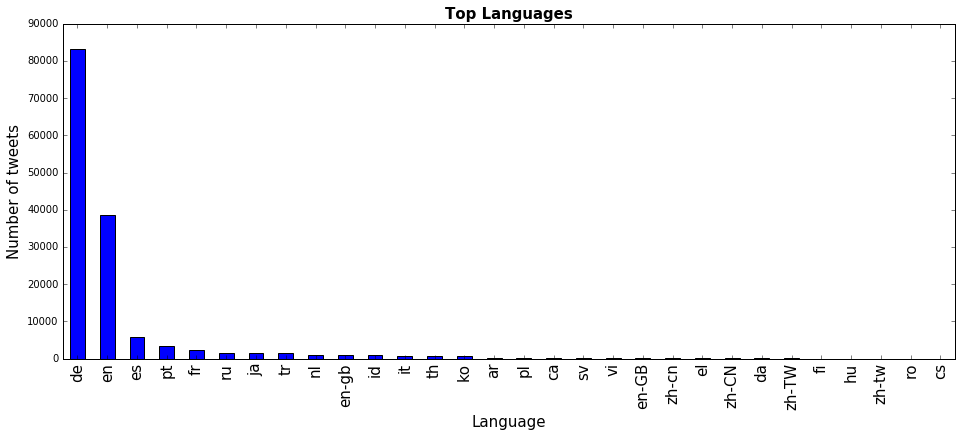

In [5]:
lang = users['lang'].value_counts()

print("Total number of languages: %s" %len(lang))

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Language', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Languages', fontsize=15, fontweight='bold')
lang[0:30].plot( kind='bar', color='blue', figsize=(16,6))

### Twitter User: Created At

- Auto Field

In [6]:
users['created_at'] = pd.to_datetime(users['created_at'])
dates = users[['created_at', 'id']]

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [7]:
year_month_dict = {}
year_month_dict['year'] = dates['created_at'].dt.year 
year_month_dict['month'] = dates['created_at'].dt.month 
year_month_dict['day'] = dates['created_at'].dt.day 
year_month = pd.DataFrame(data=year_month_dict)

dates['year month'] = pd.to_datetime(year_month)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


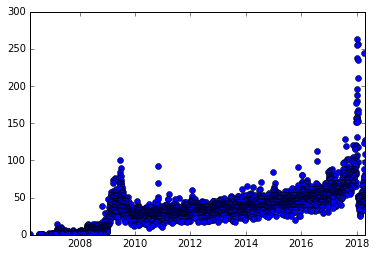

In [8]:
dates_by_month = dates['year month'].value_counts()


plt.plot_date(dates_by_month.index, dates_by_month)

### Twitter User: Location

- Nullable . The user-defined location for this account’s profile. Not necessarily a location, nor machine-parseable. This field will occasionally be fuzzily interpreted by the Search service
- Free Text Field

Total number of locations: 53
Number of users with locations: 67.75% - 97972 


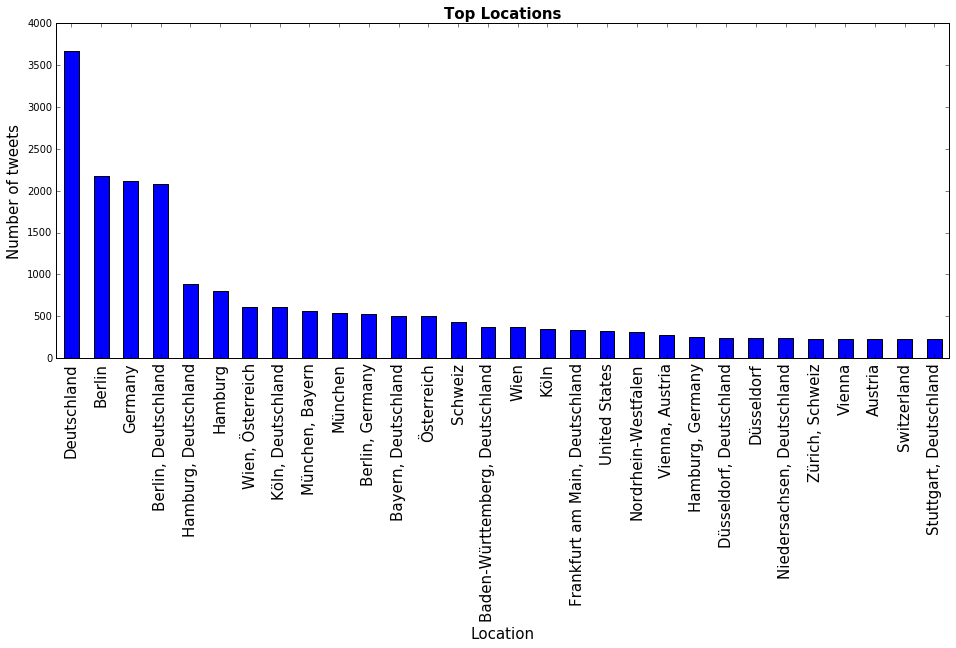

In [17]:
locations = users['location'].value_counts()
users_w_location = users[users['location'].notnull()]

print("Total number of locations: %s" %len(lang))
print("Number of users with locations: %0.02f%% - %s " 
              %((len(users_w_location) / len(users) * 100), len(users_w_location)))

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Locations', fontsize=15, fontweight='bold')
locations[0:30].plot( kind='bar', color='blue', figsize=(16,6))

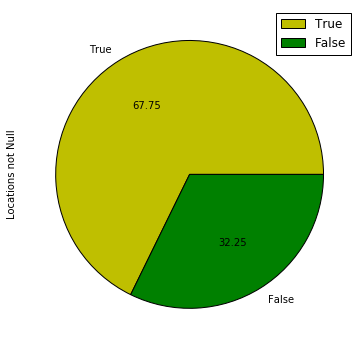

In [10]:
users_pie = users['location'].notnull()

users_pie_value_count = users_pie.value_counts()
users_pie_value_count.name = "Locations not Null"
users_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

### Twitter User: Verified

- When true, indicates that the user has a verified account.
    - https://support.twitter.com/articles/119135-faqs-about-verified-accounts

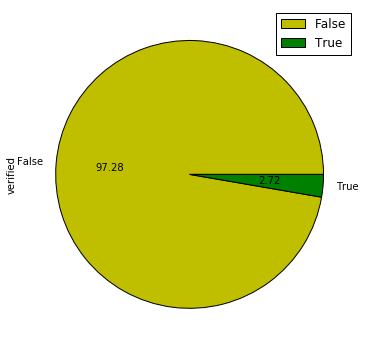

In [11]:
users_pie = users['verified']
users_pie_value_count = users_pie.value_counts()
users_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

### Twitter User: Protected
- When true, indicates that this user has chosen to protect their Tweets
    - https://help.twitter.com/de/safety-and-security/public-and-protected-tweets

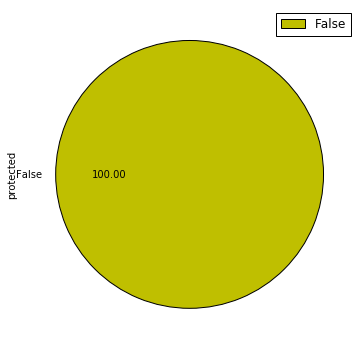

In [12]:
users_pie = users['protected']

users_pie_value_count = users_pie.value_counts()
users_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

### Twitter User: geo_enabled
- When true, indicates that the user has enabled the possibility of geotagging their Tweets. This field must be true for the current user to attach geographic data when using POST statuses / update .

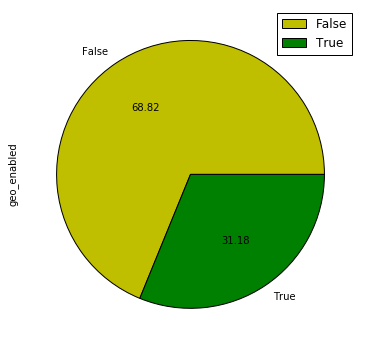

In [13]:
users_pie = users['geo_enabled']

users_pie_value_count = users_pie.value_counts()
users_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

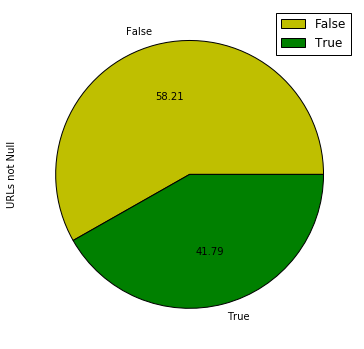

In [14]:
users_pie = users['url'].notnull()

users_pie_value_count = users_pie.value_counts()
users_pie_value_count.name = "URLs not Null"
users_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

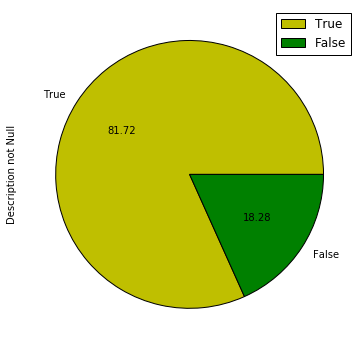

In [15]:
users_pie = users['description'].notnull()

users_pie_value_count = users_pie.value_counts()
users_pie_value_count.name = "Description not Null"
users_pie_value_count.plot.pie(figsize=(6, 6), colors=['y', 'g'],autopct='%.2f', legend=True)

### Twitter User: URL

- Free Text Field
- Check: Different users with same URL? 

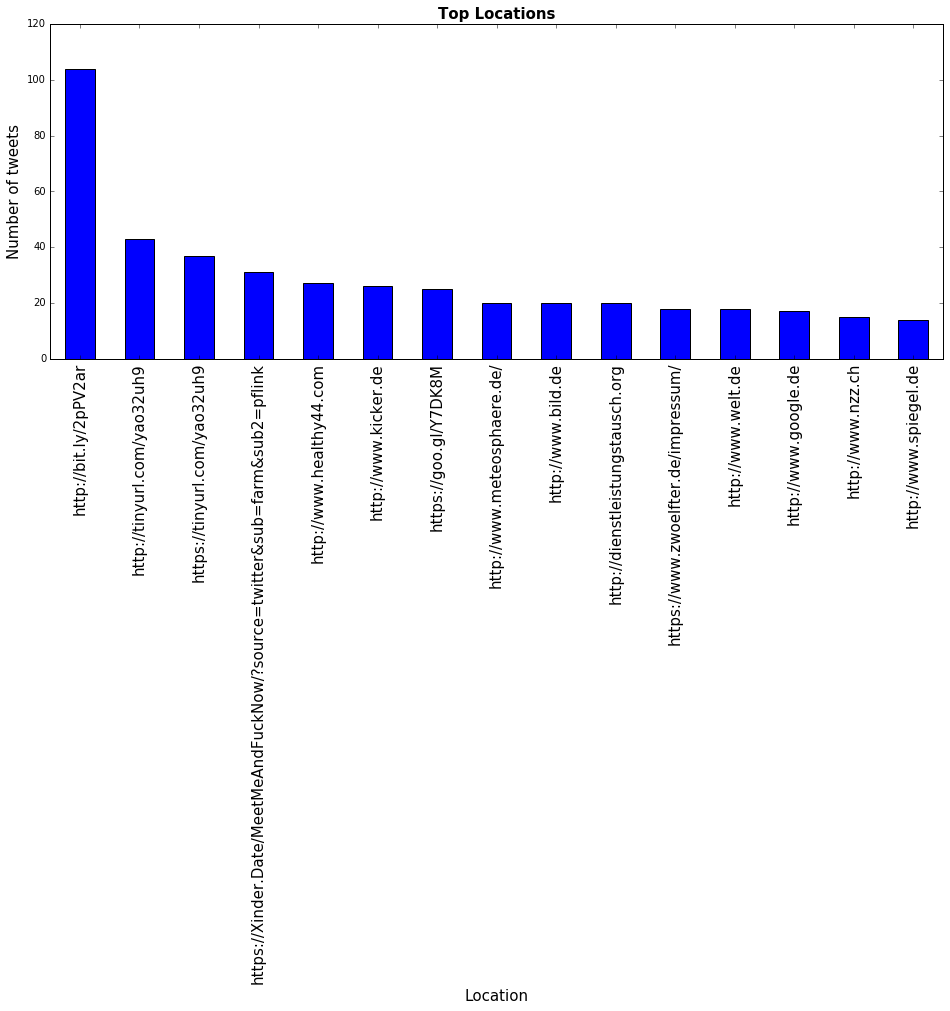

In [16]:
urls = users['url'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top Locations', fontsize=15, fontweight='bold')
urls[0:15].plot( kind='bar', color='blue', figsize=(16,6))

In [18]:
urls[0:30]

http://bit.ly/2pPV2ar                                                        104
http://tinyurl.com/yao32uh9                                                   43
https://tinyurl.com/yao32uh9                                                  37
https://Xinder.Date/MeetMeAndFuckNow/?source=twitter&sub=farm&sub2=pflink     31
http://www.healthy44.com                                                      27
http://www.kicker.de                                                          26
https://goo.gl/Y7DK8M                                                         25
http://www.meteosphaere.de/                                                   20
http://www.bild.de                                                            20
http://dienstleistungstausch.org                                              20
https://www.zwoelfter.de/impressum/                                           18
http://www.welt.de                                                            18
http://www.google.de        